<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/HW5_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

please ensure that you added pwl_fit_data.csv to your colab 

In [5]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

df = pd.read_csv('/content/pwl_fit_data.csv')
x = df['x'].values
y = df['y'].values
x = x.reshape((-1,1))
y = y.reshape((-1,1))

In [27]:
results = dict()
costs = dict()

implementation with zero internal knot

In [34]:
internal_knot_number = 0
alpha = cvx.Variable((1,1))
beta = cvx.Variable((1,1))
obj = 0
for i in range(len(x)):
    le = alpha[0][0]*x[i]+beta[0][0]
    obj += (le-y[i])**2

objective = cvx.Minimize(obj)
problem = cvx.Problem(objective)
costs['simple line'] = problem.solve()

alpha0 = alpha.value
beta0 = beta.value
yhat = alpha0 * x + beta0
results['simple line'] = yhat
print('alpha:')
print(alpha0)
print('beta:')
print(beta0)

alpha:
[[1.91099408]]
beta:
[[-0.87251704]]


1 to 3 internal knot

In [36]:
for i in range(1,4):
    internal_knot_number = i
    a = np.linspace(0,1,internal_knot_number+2,True).reshape((-1,1))
    K = internal_knot_number + 1 # number of intervals
    alpha = cvx.Variable((K,1))
    beta = cvx.Variable((K,1))

    const1 = []
    const2 = []
    for i in range(K-1):
        const1+= [alpha[i] <= alpha[i+1]]
        const2+= [alpha[i][0] * a[i+1][0] + beta[i][0] == alpha[i+1][0] * a[i+1][0] + beta[i+1][0]]
    constraints = const1 + const2

    obj = 0
    for i in range(len(x)):
        le=0
        if x[i][0] >= a[0] and x[i][0] <= a[1]:
            le = alpha[0][0]*x[i]+beta[0][0]
        else:
            for j in range(1,K): 
                if x[i][0] > a[j] and x[i][0] <= a[j+1]:
                    le = alpha[j][0]*x[i]+beta[j][0]
                    break
        obj += (le-y[i])**2

    objective = cvx.Minimize(obj)
    problem = cvx.Problem(objective,constraints)
    costs[f'{internal_knot_number} knots'] = problem.solve()
    yhat = np.zeros_like(y)
    alpha = alpha.value
    beta = beta.value
    for i in range(len(x)):
        le=0
        if x[i][0] >= a[0] and x[i][0] <= a[1]:
            yhat[i][0] = alpha[0][0]*x[i]+beta[0][0]
        else:
            for j in range(1,K): 
                if x[i][0] > a[j] and x[i][0] <= a[j+1]:
                    yhat[i][0] = alpha[j][0]*x[i]+beta[j][0]
                    break
    results[f'{internal_knot_number} knots'] = yhat
    print(f'###{internal_knot_number} knots:')
    print('alpha:')
    print(alpha)
    print('beta:')
    print(beta)

###1 knots:
alpha:
[[-0.27079138]
 [ 4.09277954]]
beta:
[[-0.33252514]
 [-2.5143106 ]]
###2 knots:
alpha:
[[-1.80609501]
 [ 2.66743265]
 [ 4.24773016]]
beta:
[[-0.10259035]
 [-1.59376624]
 [-2.64729791]]
###3 knots:
alpha:
[[-3.15578753]
 [ 2.11553289]
 [ 2.67624702]
 [ 4.89929447]]
beta:
[[ 0.03093486]
 [-1.28689525]
 [-1.56725231]
 [-3.2345379 ]]


In [37]:
print(costs)

{'simple line': 12.74074376455178, '1 knots': 2.624273679631359, '2 knots': 0.600565768079377, '3 knots': 0.2192852500955145}


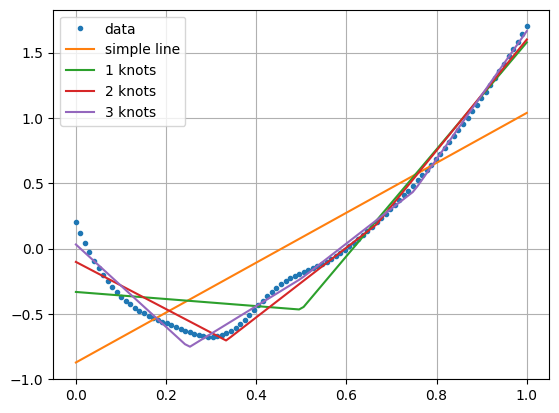

In [50]:
plt.figure()
plt.plot(x,y,'.',label='data')
for key,value in (results.items()):
    plt.plot(x,value , label=key)
plt.legend()
plt.grid()